# Webscrapping using BeautifulSoup

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap Indonesian inflation rate from pusatdata.kontan.co.id, it's one of data center from indonesian economic newspaper that provide couple of useful financial information. To do this we will only use a couple default library from python and BeautifulSoup. 

This module is made as easy and simple as possible which can be used for new developer to learn how to webscrapping using Beautiful Soup. But to do webscrapping you will need a bit of knowlage in `html` which I'll also try to help to explain what you needed at this module, but it is always better if you understand a bit what in `html` first. You can read it quickly at [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc) documentation. It explain what is html and what beautiful soup exactly do at it landing page.

## Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` and you are good to go. But here some libraries that needed to be installed first that I use at bis module : 

- beautifulSoup4
- pandas
- matplotlibs

## Background

At this project we try to scrap Ethereum USD (Historical Data) from CoinGecko.com data center website. CoinGecko is the world’s largest independent cryptocurrency data aggregator with over 13,000+ different cryptoassets tracked across more than 500+ exchanges worldwide. CoinGecko was founded in 2014 by TM Lee (CEO) and Bobby Ong (COO) with the mission to democratize the access of crypto data and empower users with actionable insights. We also deep dive into the crypto space to deliver valuable insights to our users through our cryptocurrency reports, as well as our publications, newsletter and more. We will try to scrap this sites for educational purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Ethereum's Market Cap, Volume, Open, and Close value. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 5 points from this sites. That is Date, Market Cap, Volume, Open, and Close. 

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the .get() function here, but Requests allows you to use other functions like .post() and .put() to send those requests as well. At this case we will going to the Kontan data center inflation rate page, you can click [here](https://pusatdata.kontan.co.id/makroekonomi/inflasi) to follow what exactly that link goes to. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

## Getting the HTML from the Webpage

In [33]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [34]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But we’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this project we will only use `BeautifulSoup`.

Let's make Beautiful soup object and feel free to explore the object here.

In [35]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our get_url object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character.

In [36]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | 


### Getting right key to extract right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/webpage.png">

The information that we need are the Date and the volume of Ethereum which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

<img src="asset/datatable.png">

From inspect element we know that we need to find the line table with class `table table-striped text-sm text-lg-normal`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [37]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


As we can see from the line we just extract, we get all the content we needed. As for what is table, The `table` tag defines a division or a section in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the `table` tag. 
    
The `find()` function can help you to get you the part of the html code that you needed. While most of the html is contained in `table`, `th`, `td` you can differsiate them with help of `attrs=`, you can insert anything that in the `table`, `th`, `td` a the attrs to help you find the part you needed. 

Now, we need to get 5 information, that is the Data, Market Cap, Volume, Open, and Close of Ethereum coins. Which you can read from above code, Date is contained within `th` with "font-semibold text-center", Market Cap, Volume, Open, and Close is contained within `td` in "text-center" sequentially and repeatedly. 
    
Now I will introduce you to other useful function from beautiful soup, that's `find_all`. While the `find` fuction method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.

For example I'll try to extract the data of date information from the html. You can use slicer to help you.

In [38]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [39]:
table.find_all('td', attrs={'class':'text-center'})

[<td class="text-center">
 $253,607,549,372
 </td>,
 <td class="text-center">
 $27,149,143,847
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $243,040,539,437
 </td>,
 <td class="text-center">
 $30,629,329,806
 </td>,
 <td class="text-center">
 $2,087.52
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 $229,354,016,311
 </td>,
 <td class="text-center">
 $24,316,408,028
 </td>,
 <td class="text-center">
 $1,973.93
 </td>,
 <td class="text-center">
 $2,087.52
 </td>,
 <td class="text-center">
 $209,989,265,221
 </td>,
 <td class="text-center">
 $24,249,510,321
 </td>,
 <td class="text-center">
 $1,817.05
 </td>,
 <td class="text-center">
 $1,973.93
 </td>,
 <td class="text-center">
 $213,871,849,532
 </td>,
 <td class="text-center">
 $25,981,381,067
 </td>,
 <td class="text-center">
 $1,833.46
 </td>,
 <td class="text-center">
 $1,817.05
 </td>,
 <td class="text-center">
 $231,644,258,7

As you can see get already get the necessary key to extract all needed data. To get the only text information you can add `.text`. Remember you need to only get one information before you use `.text` otherwise it will return error.

### Extracting the Information

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

Finding row length of Date.

In [40]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

547

Finding row length of Market Cap, Volume, Open, and Close.

In [41]:
row1 = table.find_all('td', attrs={'class':'text-center'})
row_length1 = len(row1)
row_length1

2188

Now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- we will find is all cell of the columns which contain Date, Market Cap, Volume, Open, and Close. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [42]:
temp = [] #init
n = 0
for i in range(0, row_length):
    while n < row_length1:
        #get period 
        period = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
        i+=1

        #get market cap
        market_cap = table.find_all('td', attrs={'class':'text-center'})[n].text
        market_cap = market_cap.strip() #to remove excess white space
        n += 1
    
        #get volume
        volume = table.find_all('td', attrs={'class':'text-center'})[n].text
        volume = volume.strip() #to remove excess white space
        n +=1
    
        #get Open
        open_price = table.find_all('td', attrs={'class':'text-center'})[n].text
        open_price = open_price.strip() #to remove excess white space
        n +=1
    
        #get close
        close_price = table.find_all('td', attrs={'class':'text-center'})[n].text
        close_price = close_price.strip() #to remove excess white space
        n +=1    
        
        temp.append((period, market_cap, volume, open_price, close_price))
        
temp

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that. 

In [43]:
temp = temp[::-1]
temp

[('2020-01-01', '$14,097,451,632', '$7,103,187,151', '$129.19', '$130.48'),
 ('2020-01-02', '$14,230,588,104', '$6,623,732,041', '$130.48', '$127.05'),
 ('2020-01-03', '$13,859,793,330', '$6,497,297,884', '$127.05', '$133.70'),
 ('2020-01-04', '$14,613,194,776', '$9,655,245,100', '$133.70', '$134.14'),
 ('2020-01-05', '$14,636,213,160', '$6,958,393,690', '$134.14', '$135.01'),
 ('2020-01-06', '$14,738,834,254', '$7,260,645,128', '$135.01', '$143.81'),
 ('2020-01-07', '$15,692,578,635', '$9,514,201,882', '$143.81', '$143.02'),
 ('2020-01-08', '$15,656,491,188', '$9,440,938,788', '$143.02', '$140.27'),
 ('2020-01-09', '$15,364,547,562', '$10,095,847,759', '$140.27', '$137.86'),
 ('2020-01-10', '$14,998,595,868', '$7,280,640,218', '$137.86', '$144.60'),
 ('2020-01-11', '$15,647,071,448', '$10,273,370,788', '$144.60', '$142.18'),
 ('2020-01-12', '$15,564,837,468', '$9,737,605,323', '$142.18', '$145.42'),
 ('2020-01-13', '$15,859,031,094', '$8,488,793,478', '$145.42', '$143.59'),
 ('2020-01

In [44]:
len(temp)

547

Then after we fix our list a bit, as usual we will input it to pandas' dataframe.

## Creating data frame & Data wrangling

Put the array into dataframe

In [45]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','Market_Cap', 'Volume', 'Open', 'Close'))
df.head()

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,"$14,097,451,632","$7,103,187,151",$129.19,$130.48
1,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
2,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
3,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
4,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01


Let's check our dataframe data types to see if our data is useable. 

In [46]:
df.dtypes

Date          object
Market_Cap    object
Volume        object
Open          object
Close         object
dtype: object

Usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change the inflation to float datatype, but before we can do that we need to change the "," to "." first. To do this we can use the help of `str.replace()`. Then lastly let's fix our period data type.

In [47]:
df['Close'] = df['Close'].str.replace("$","")
df['Open'] = df['Open'].str.replace("$","")
df['Volume'] = df['Volume'].str.replace("$","")
df['Market_Cap'] = df['Market_Cap'].str.replace("$","")

df['Close'] = df['Close'].str.replace(",","")
df['Open'] = df['Open'].str.replace(",","")
df['Volume'] = df['Volume'].str.replace(",","")
df['Market_Cap'] = df['Market_Cap'].str.replace(",","")
df['Close'] = df['Close'].str.replace("N/A","2279.35")

df['Close'] = df['Close'].astype('float64')
df['Open'] = df['Open'].astype('float64')
df['Volume'] = df['Volume'].astype('float64')
df['Market_Cap'] = df['Market_Cap'].astype('float64')
df['Date'] = df['Date'].astype('datetime64')

df.dtypes

C:\Users\pinos\AppData\Local\Temp\ipykernel_5832\2421433493.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close'] = df['Close'].str.replace("$","")
C:\Users\pinos\AppData\Local\Temp\ipykernel_5832\2421433493.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace("$","")
C:\Users\pinos\AppData\Local\Temp\ipykernel_5832\2421433493.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$","")
C:\Users\pinos\AppData\Local\Temp\ipykernel_5832\242

Date          datetime64[ns]
Market_Cap           float64
Volume               float64
Open                 float64
Close                float64
dtype: object

The results of the data after cleaning the data.

In [48]:
df.head()

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,1.409745e+10,7.103187e+09,129.19,130.48
1,2020-01-02,1.423059e+10,6.623732e+09,130.48,127.05
2,2020-01-03,1.385979e+10,6.497298e+09,127.05,133.70
3,2020-01-04,1.461319e+10,9.655245e+09,133.70,134.14
4,2020-01-05,1.463621e+10,6.958394e+09,134.14,135.01


To create a data table containing `Date` and `Ethereum Eolume Eluctuations`, drop unnecessary columns (`Market_Cap`, `Open`, `Close`).

In [49]:
df1 = df.drop(columns=['Market_Cap', 'Open', 'Close'])
df1

,Date,Volume
0,2020-01-01,7.103187e+09
1,2020-01-02,6.623732e+09
2,2020-01-03,6.497298e+09
3,2020-01-04,9.655245e+09
4,2020-01-05,6.958394e+09
...,...,...
542,2021-06-26,2.598138e+10
543,2021-06-27,2.424951e+10
544,2021-06-28,2.431641e+10
545,2021-06-29,3.062933e+10


To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` 

This is the final table that display `Date` and `Ethereum Volume Fluctuations`

In [50]:
df2 = df1.set_index('Date')
df2.head()

,Volume
Date,
2020-01-01,7.103187e+09
2020-01-02,6.623732e+09
2020-01-03,6.497298e+09
2020-01-04,9.655245e+09
2020-01-05,6.958394e+09


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

We can do our simple visualisation to put the cherry on top.

Ethereum Volume Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

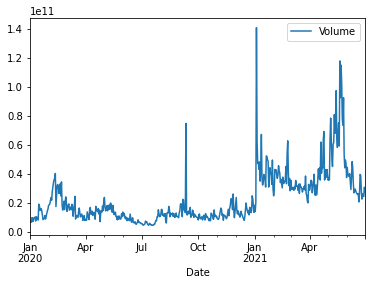

In [51]:
df.plot.line(x='Date', y='Volume')

Ethereum Market Cap Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

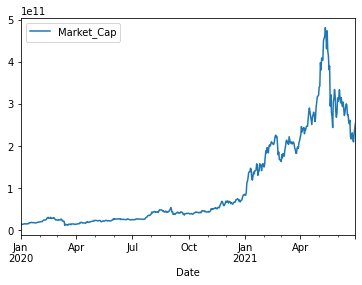

In [52]:
df.plot.line(x='Date', y='Market_Cap')

Ethereum Open Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

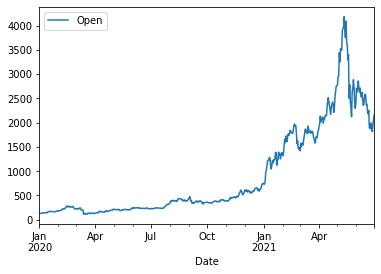

In [53]:
df.plot.line(x='Date', y='Open')

Ethereum Close Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

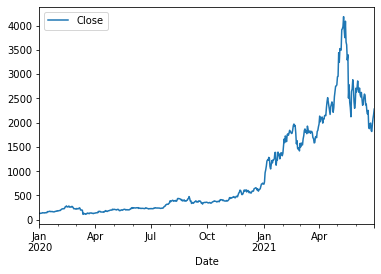

In [54]:
df.plot.line(x='Date', y='Close')

Ethereum Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

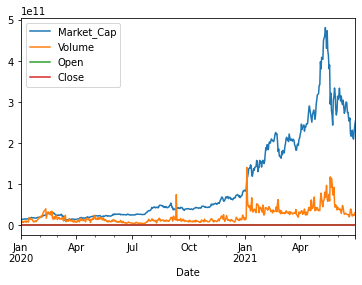

In [55]:
df.plot.line(x='Date', y=['Market_Cap', 'Volume', 'Open', 'Close'])

> Based on the Ethereum Volume Fluctuations Diagram, we can concluded that on period 2020-01-01 to 2021-06-30, the highest value of ethereum volume was in january

We already finish our web scrapping job, now we have all the data we need and we can move on to the next part of the project using pandas usual. In conclusion when you don't have a direct access to a data from a website you can always do the scrapping method. There is a couple library that can do same task like `scrapy` that can build bot to automaticly crawl data, but we choose beautiful soup since it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage (for example, a list of images). 

After this you also can implement the scrapping to one function and put it at the flask webapp, which you can find the demo [here](https://github.com/t3981-h/LikesRatio) and you can go to inflation branch to see example that scrap a same page or you can visit [Pricemate](https://github.com/onlyphantom/pricemate). Which scrap tiket.com data to get train price list. I hope this short module help you to understand and can kickstart you to learn more about webscrapping using Beautifulsoup. Also feel free to contact us at mentor@algorit.ma if you have more question.

Happy learning~

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.